<a href="https://colab.research.google.com/github/computacao-aplicada/lab01-intro-GbrielZanoni/blob/main/Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01: Introdução à Visão Computacional e Computação Gráfica

### 🎯 Objetivos da Aula
- Compreender o que é Visão Computacional.
- Diferenciar Visão Computacional, Processamento de Imagens e Computação Gráfica.
- Realizar manipulações simples com imagens.
- Explorar conceitos de pixels, resoluções e canais de cor.


## O que é Visão Computacional?

A **Visão Computacional** é uma área da Inteligência Artificial que busca permitir que os computadores 'vejam' e interpretem o mundo visual, assim como os humanos.

Ela utiliza imagens e vídeos como entrada e tenta extrair informações úteis, como:
- Detecção de objetos
- Reconhecimento facial
- Segmentação de imagem
- Rastreamento de movimento

A **Computação Gráfica**, por outro lado, está mais voltada à geração de imagens — como renderizar cenas em 3D.

Já o **Processamento de Imagens** se concentra na transformação e análise de imagens (normalmente 2D) para melhorar a qualidade ou extrair características.

| Área                  | Foco                             |
|-----------------------|----------------------------------|
| Visão Computacional   | Entendimento e interpretação     |
| Computação Gráfica    | Geração de imagens               |
| Processamento de Imagens | Manipulação e melhoria de imagens |


In [ ]:
# Importação das bibliotecas necessárias
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Exibir gráficos inline
%matplotlib inline


## Exemplo prático: Carregar e visualizar uma imagem

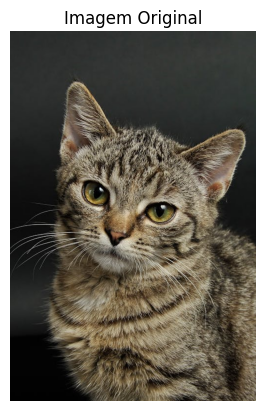

In [ ]:
# Carregar imagem de exemplo
from PIL import Image
import requests

url = "https://images.pexels.com/photos/2071882/pexels-photo-2071882.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500"
image = Image.open(requests.get(url, stream=True).raw)
image = image.convert("RGB")  # Garante 3 canais

# Mostrar imagem
plt.imshow(image)
plt.title("Imagem Original")
plt.axis('off')
plt.show()


## Manipulação dos canais RGB

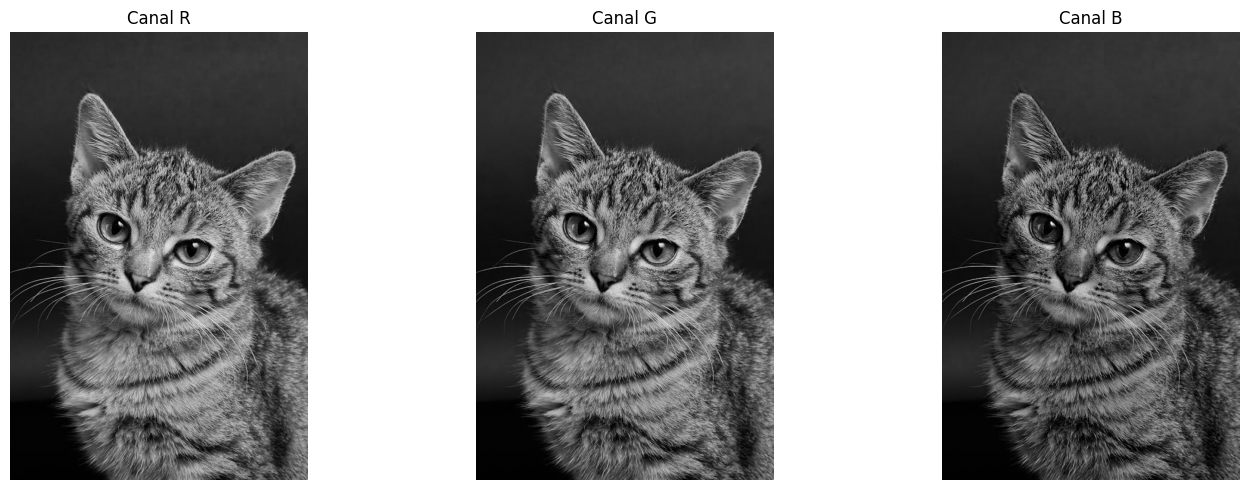

In [ ]:
# Separar os canais
r, g, b = image.split()

# Exibir os canais
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, channel, color in zip(axs, [r, g, b], ['R', 'G', 'B']):
    ax.imshow(channel, cmap='gray')
    ax.set_title(f'Canal {color}')
    ax.axis('off')
plt.tight_layout()
plt.show()


## Conversão para escala de cinza

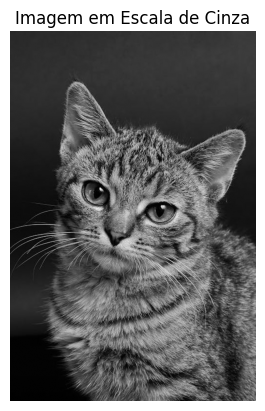

In [ ]:
# Converter para escala de cinza
gray_image = image.convert("L")

# Mostrar imagem em tons de cinza
plt.imshow(gray_image, cmap='blue')
plt.title("Imagem em Escala de Cinza")
plt.axis('off')
plt.show()


## Explorando os pixels

In [ ]:
# Converter para numpy e mostrar valor de alguns pixels
np_image = np.array(image)
print("Formato da imagem:", np_image.shape)
print("Valor do pixel (20, 35):", np_image[20, 35])


Formato da imagem: (753, 500, 3)
Valor do pixel (20, 35): [41 43 42]


## 🧠 Exercício

Tente modificar o código acima para:

- Exibir apenas o canal vermelho da imagem.
- Modifique aleatoriamente o canal vermelho e gere a imagem novamente.
- Criar uma imagem negativa (inverter as cores).
- Salvar uma nova imagem modificada no disco.
- Recorte um pedaço da imagem e salve em disco.

---
Cada um dos pontos do exercício deve ser uma célula separada!


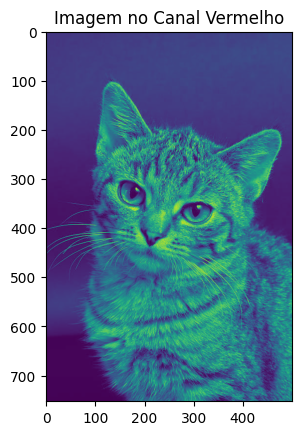

In [ ]:
# Exibir apenas o canal vermelho da imagem.

r, g, b = image.split()

plt.imshow(r)
plt.title("Imagem no Canal Vermelho")
plt.axis('on')
plt.show()

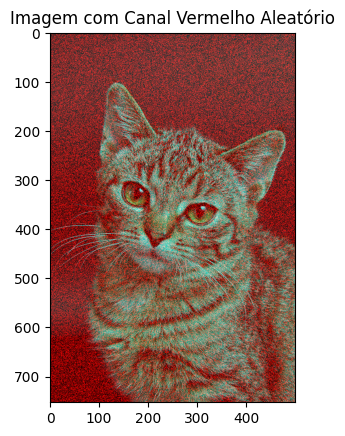

Formato da imagem: (753, 500, 3)
Valor do pixel (20, 35): [224  43  42]


In [ ]:
# Modifique aleatoriamente o canal vermelho e gere a imagem novamente.

import numpy

r, g, b = image.split()

vermelho_aleatorio = Image.fromarray(np.random.randint(0, 256, size=np.array(r).shape, dtype=np.uint8))
imagem = Image.merge('RGB', (vermelho_aleatorio, g, b))

plt.imshow(imagem)
plt.title("Imagem com Canal Vermelho Aleatório")
plt.axis('on')
plt.show()

imagem_array = np.array(imagem)

# Aqui eu fiz pra printar o pixel específico, q foi usado anteriormente
# Pra mostrar q realmente muda aleatóriamente cada vez que roda o vermelho da imagem
print("Formato da imagem:", imagem_array.shape)
print("Valor do pixel (20, 35):", imagem_array[20, 35])

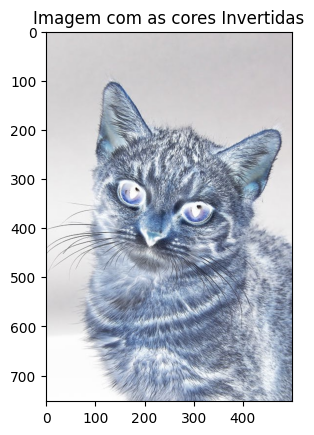

In [ ]:
# Criar uma imagem negativa (inverter as cores).
from PIL import Image, ImageOps

pixels = image.load()

for i in range(image.size[0]):
    for j in range(image.size[1]):
        x,y,z = pixels[i,j][0],pixels[i,j][1],pixels[i,j][2]
        x,y,z = abs(x-255), abs(y-255), abs(z-255)
        pixels[i,j] = (x,y,z)

plt.imshow(image)
plt.title("Imagem com as cores Invertidas")
plt.axis('on')
plt.show()

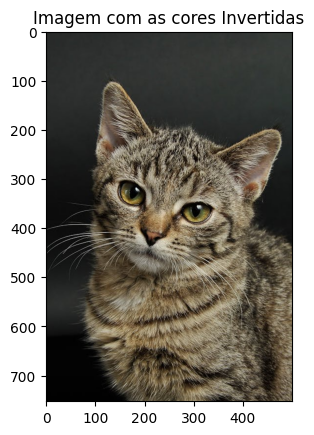

In [ ]:
# Salvar uma nova imagem modificada no disco.

pixels = image.load()

for i in range(image.size[0]):
    for j in range(image.size[1]):
        x,y,z = pixels[i,j][0],pixels[i,j][1],pixels[i,j][2]
        x,y,z = abs(x-255), abs(y-255), abs(z-255)
        pixels[i,j] = (x,y,z)

plt.imshow(image)
plt.title("Imagem com as cores Invertidas")
plt.axis('on')
plt.show()
image.save("imagem.png")

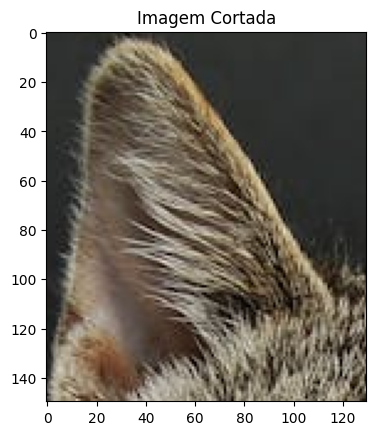

In [ ]:
# Recorte um pedaço da imagem e salve em disco.

cropado = image.crop((100, 100, 230, 250))
cropado_array = np.array(cropado)

plt.imshow(cropado_array)
plt.title("Imagem Cortada")
plt.axis('on')
plt.show()

cropado.save("imagem_recortada.png")